# Bike Rental

## Data Information

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


## Necessary Libaray

In [68]:
import numpy as np
import datetime as dt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

##  Loading Data

In [2]:
data=pd.read_csv('hour.csv')

In [3]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
# Taking Importnt feature and remove unused or not related features
data1=data.drop(['instant','dteday','casual','registered','yr'],axis=1)

## Basic Chacks

In [5]:
# Shape of data
data1.shape

(17379, 12)

In [6]:
# First five rows of data
data1.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [7]:
# Last five rows of data
data1.tail()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
17374,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61
17378,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,49


In [8]:
# state of data
data1.describe()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [9]:
# datatypes of all features
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB


In [10]:
#Unique value of categorical feature
category_features=['season','holiday','mnth','hr','weekday','workingday','weathersit']
for col in category_features:
    print(f"{col}",data1[col].unique())

season [1 2 3 4]
holiday [0 1]
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
hr [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weathersit [1 2 3 4]


### Insights/Obervation:-

* Shape of Data set is 17379 rows and 12 features
* No null value present in dataset.
* No constant value present in dataset.
* In dataset have 6 categorical features and 5 numeric feature.

## Data visualization

### Univariate analysis

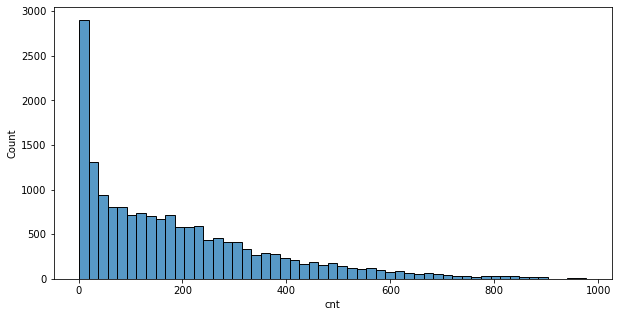

In [12]:
# Target variabel
plt.figure(figsize=(10,5))
sns.histplot(data1['cnt'])
plt.show()

* minimum count is one and maximum count is 977.
* average is  between one to 200.

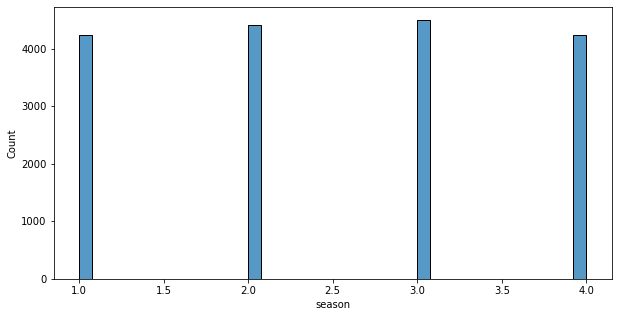

In [18]:
# season variabel
# season (1:winter, 2:spring, 3:summer, 4:fall)
plt.figure(figsize=(10,5))
sns.histplot(data1['season'])
plt.show()

* In all records summer record is highest

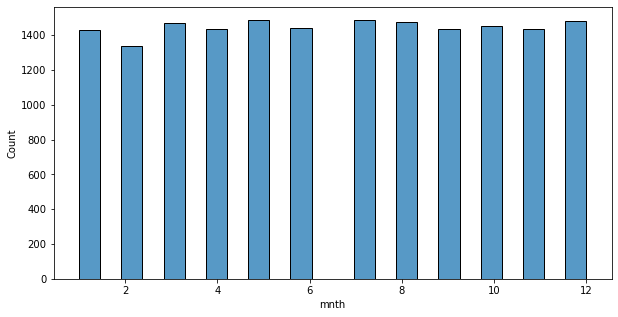

In [19]:
# mnth variabel
plt.figure(figsize=(10,5))
sns.histplot(data1['mnth'])
plt.show()

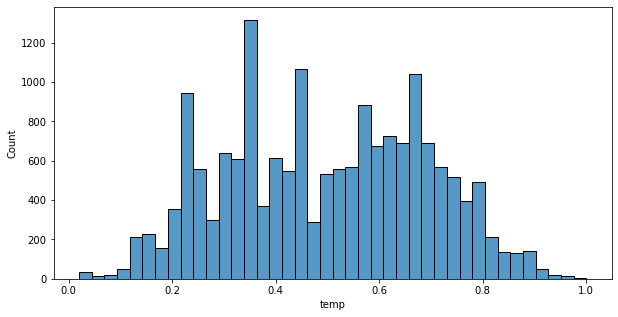

In [22]:
# temp variabel
plt.figure(figsize=(10,5))
sns.histplot(data1['temp'])
plt.show()

* Data look like normally distributed.
* Maximum temp is one.
* most data have temp 0.3 to 0.4.

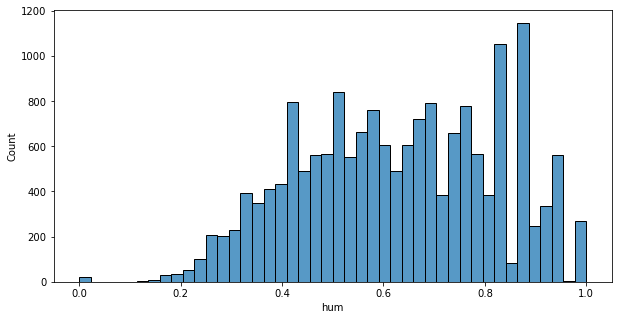

In [25]:
# hum variabel
plt.figure(figsize=(10,5))
sns.histplot(data1['hum'])
plt.show()

* humidity split between zero to one.
* most deta lie humidity range between 0.45 0.6.

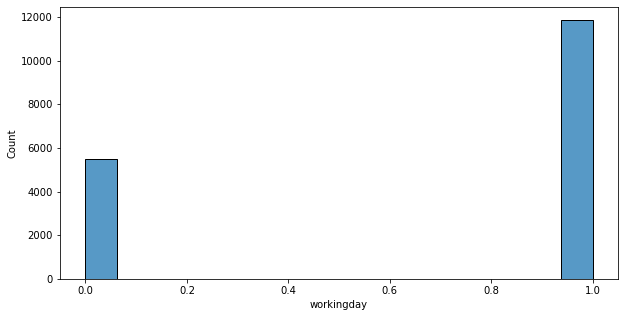

In [28]:
# workingday variabel
plt.figure(figsize=(10,5))
sns.histplot(data1['workingday'])
plt.show()

* Not holiday or not weekend record is more.

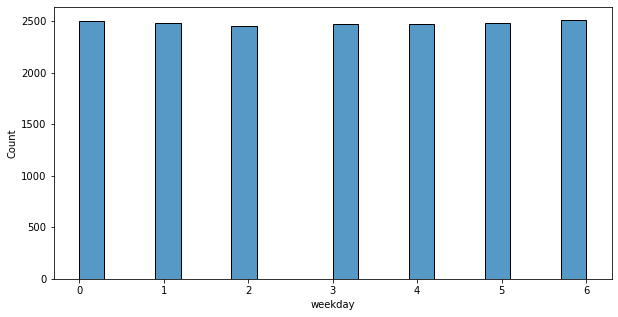

In [29]:
# weekday variabel
plt.figure(figsize=(10,5))
sns.histplot(data1['weekday'])
plt.show()

* All weekday have look like a balanced data.

### Bivariate Multivariate Analysis

<AxesSubplot:xlabel='hum', ylabel='cnt'>

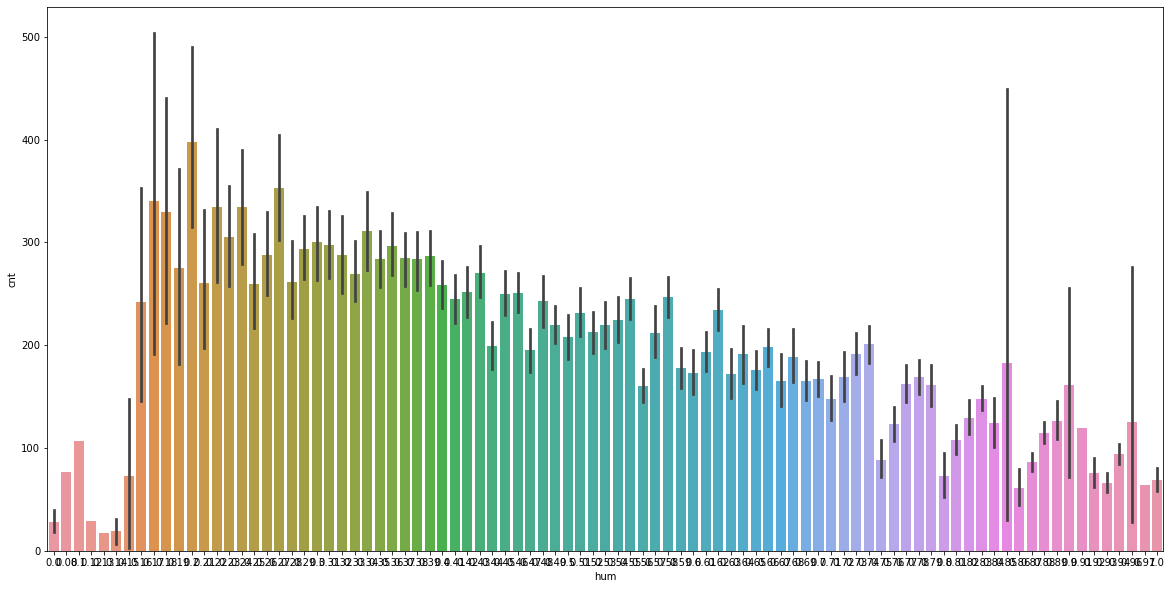

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='hum',y='cnt',data=data) 

* If humidity is increased count is decrease there is a negative correlation between humidity and count.

<AxesSubplot:xlabel='season', ylabel='cnt'>

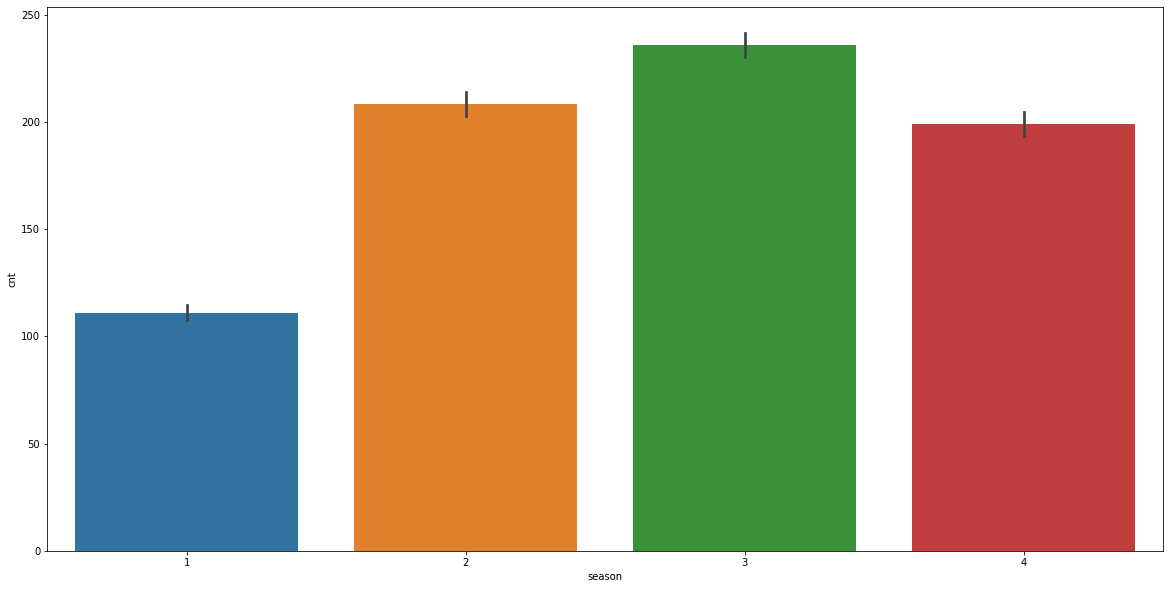

In [33]:
# 1:winter, 2:spring, 3:summer, 4:fall
plt.figure(figsize=(20,10))
sns.barplot(x='season',y='cnt',data=data) 

* Seeing above graph we can say that in summer season bike rental count increase and in winter season bike rental count is less.

<AxesSubplot:xlabel='temp', ylabel='cnt'>

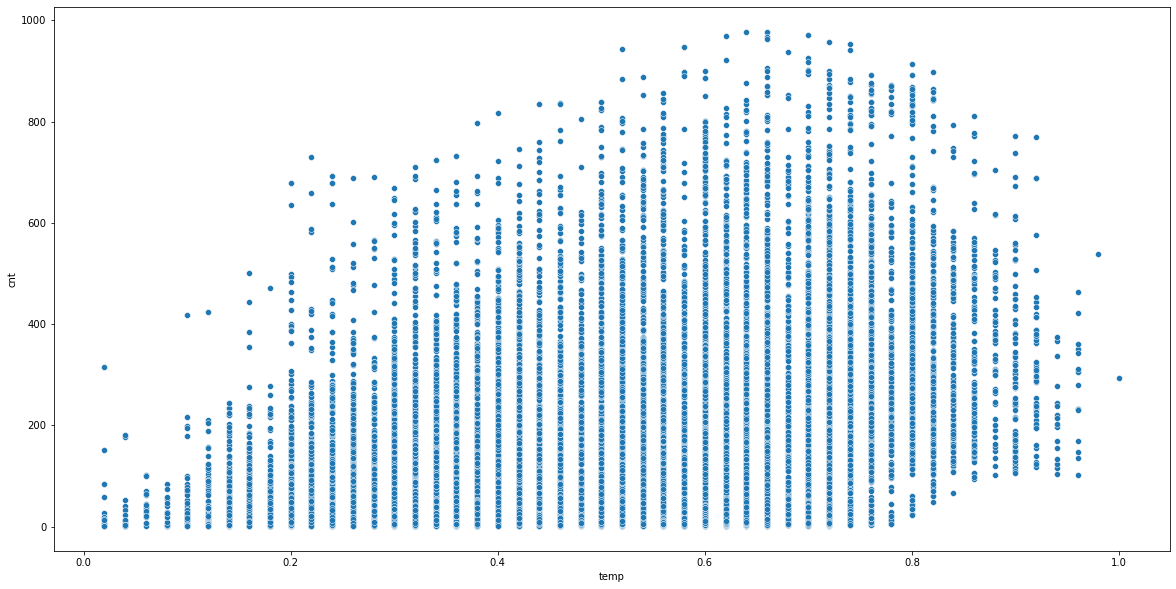

In [35]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='temp',y='cnt',data=data) 

* If temperature is increased bike rental count is  also increase there is positive correlation between temp and cnt.

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

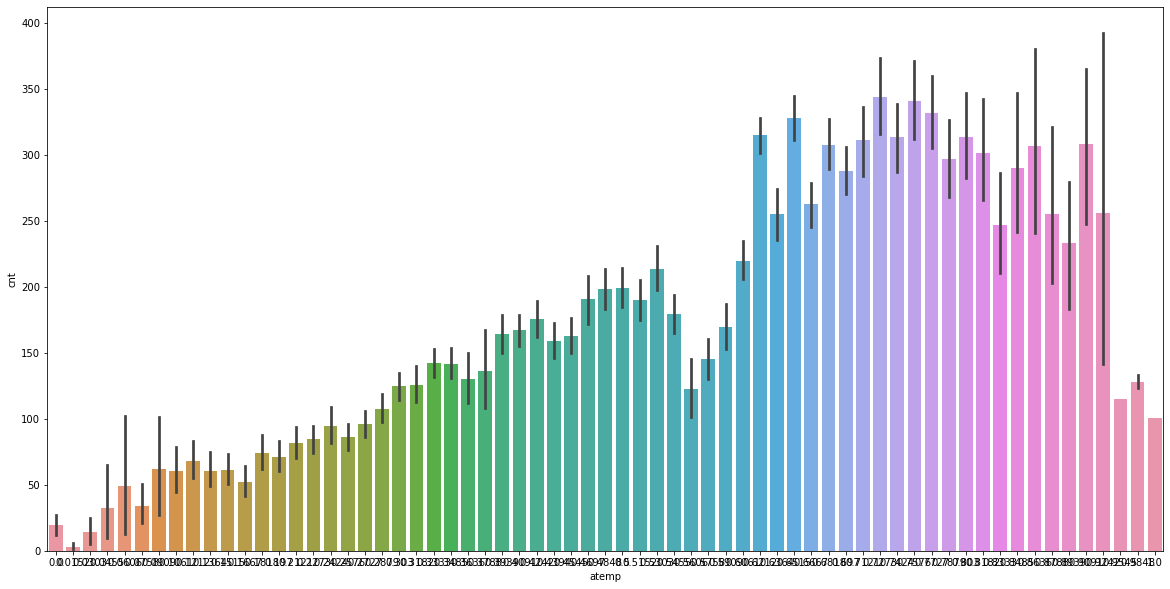

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x='atemp',y='cnt',data=data) 

* If Atemp is increased bike rental count is also increase there is positive correlation between atemp and cnt

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

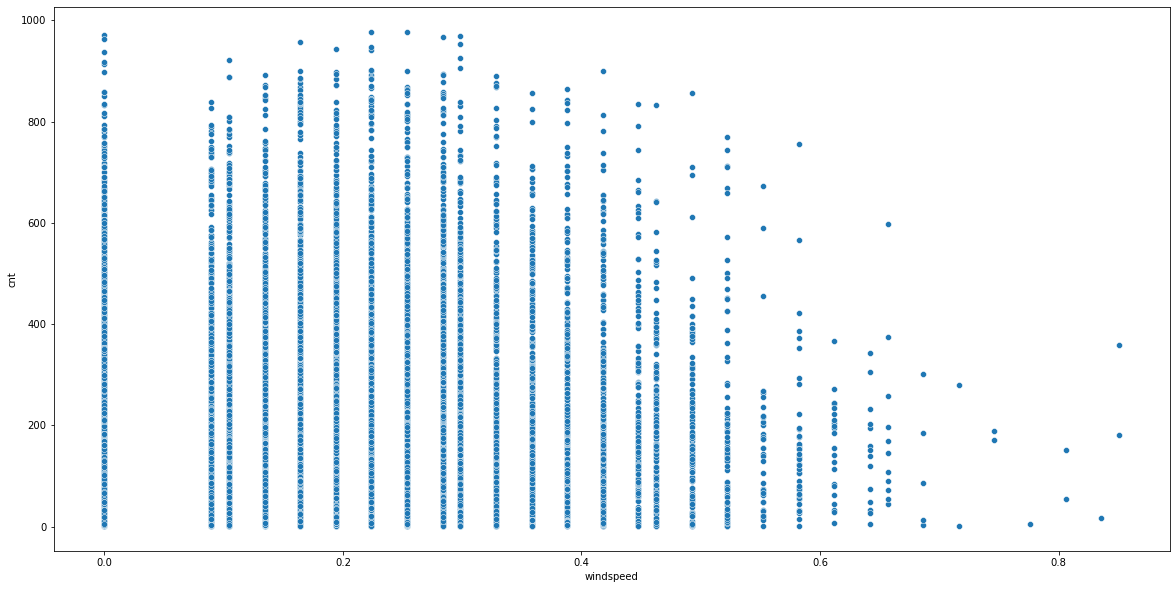

In [38]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='windspeed',y='cnt',data=data) 

* If wind speed is increased bike rental count is  decrease.

* If wind speed range have  between 0.1 to 0.4 then bike rental count is high.

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

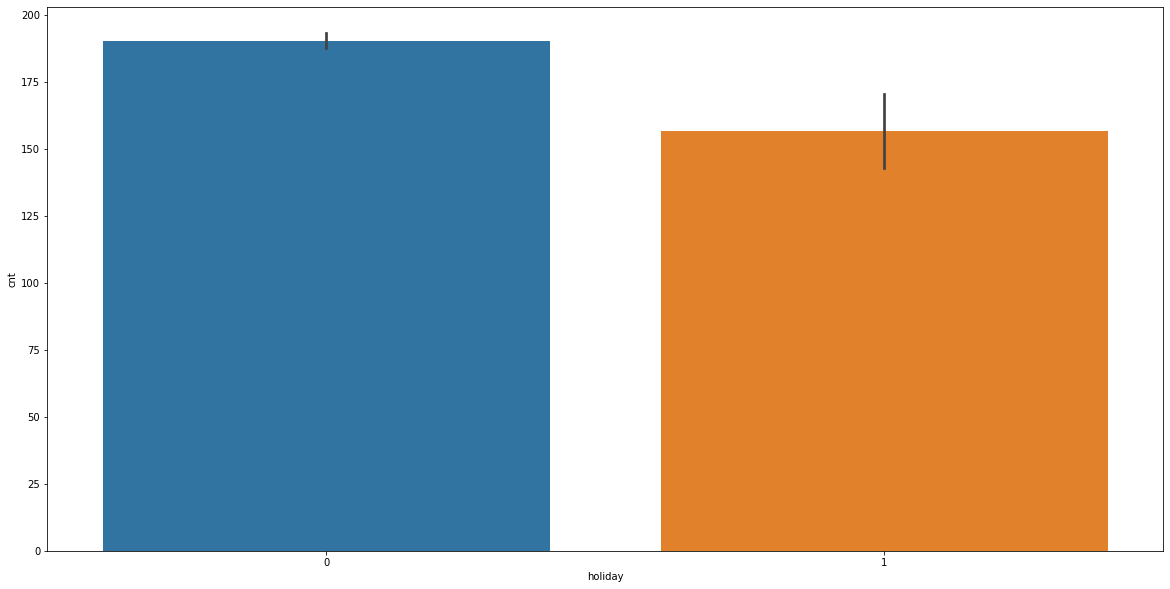

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x='holiday',y='cnt',data=data) 

* if day is not holiday then bike rental count is increased.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

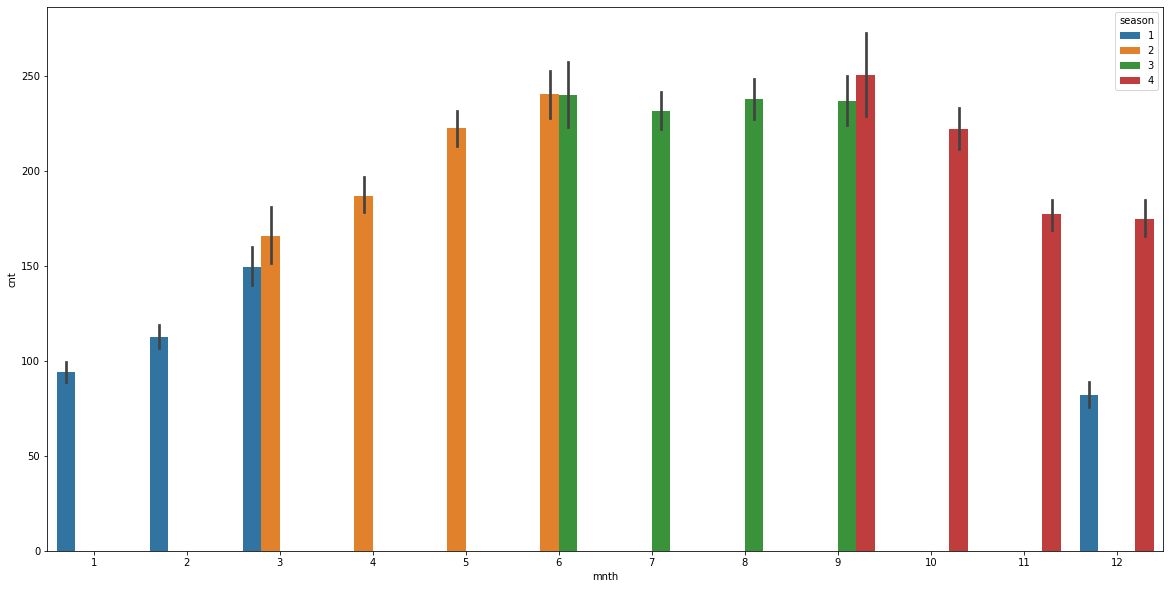

In [45]:
plt.figure(figsize=(20,10))
sns.barplot(x='mnth',y='cnt',data=data,hue='season') 

* In summer season or months of 6 to 9 bike rental count increase.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

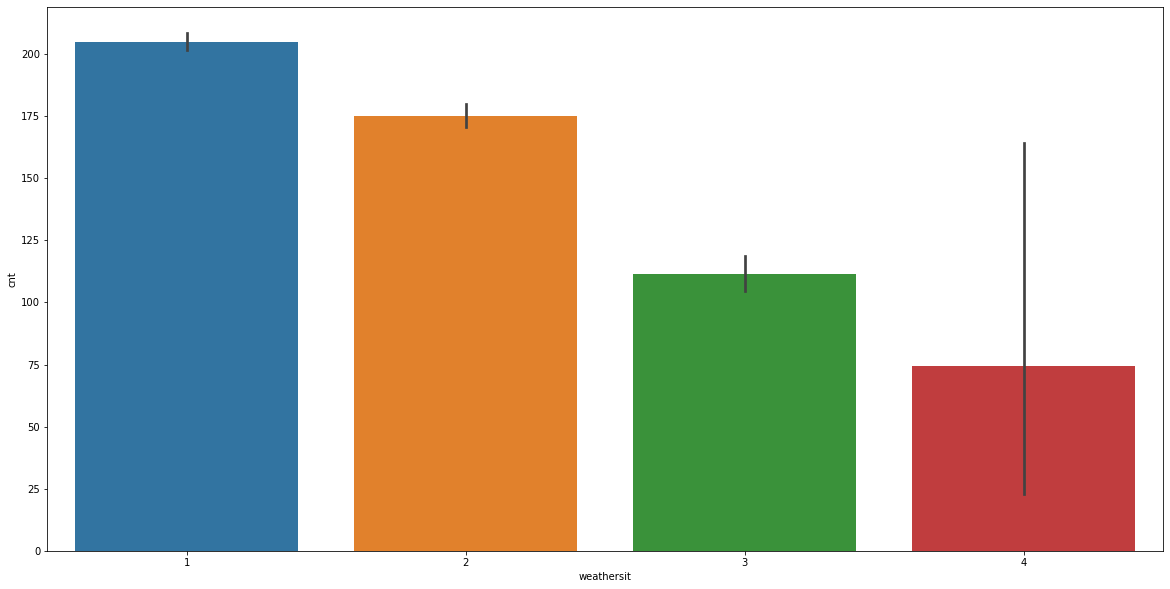

In [49]:
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

plt.figure(figsize=(20,10))
sns.barplot(x='weathersit',y='cnt',data=data,) 

* If weathersit is Clear, Few clouds, Partly cloudy and Partly cloudy than bike rental count is increase.

##  EDA

In [50]:
# Checking ull value present in dataset or not.
data1.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

* No null value present in dataset.

<AxesSubplot:xlabel='season'>

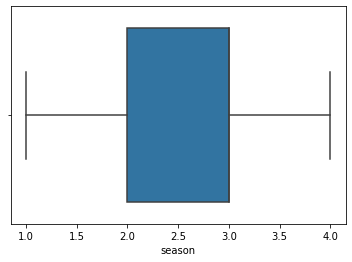

In [54]:
# Checking outlier
sns.boxplot(data['season'])

<AxesSubplot:xlabel='mnth'>

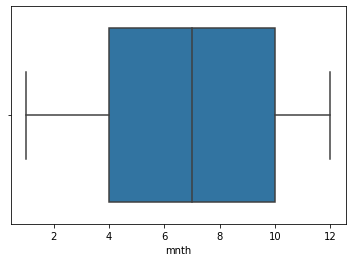

In [55]:
sns.boxplot(data['mnth'])

<AxesSubplot:xlabel='hr'>

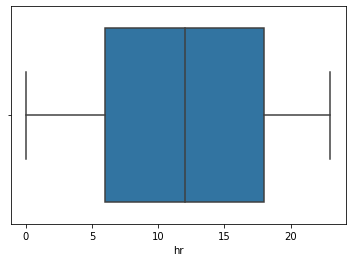

In [56]:
sns.boxplot(data['hr'])

<AxesSubplot:xlabel='holiday'>

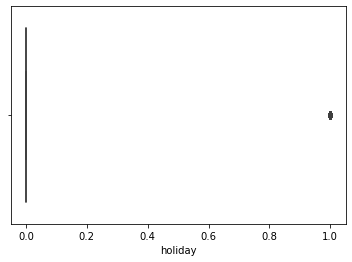

In [63]:
sns.boxplot(data['holiday'])

<AxesSubplot:xlabel='temp'>

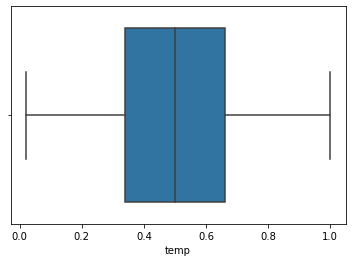

In [64]:
sns.boxplot(data['temp'])

<AxesSubplot:xlabel='atemp'>

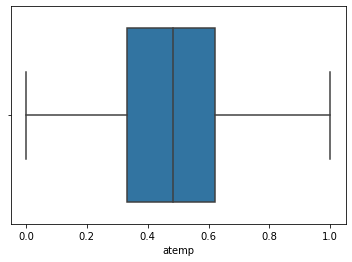

In [65]:
sns.boxplot(data['atemp'])

<AxesSubplot:xlabel='windspeed'>

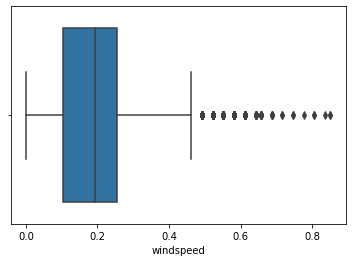

In [67]:
sns.boxplot(data['windspeed'])

* In holiday or windsped have outlier

####  Handling Outlier using IQR

In [75]:
# Interquartile range (IQR)  of Fc Feature
IQR = stats.iqr(data1.windspeed, interpolation = 'midpoint') 
IQR

0.1492

In [76]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.windspeed.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.windspeed.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR
print(min_limit)
max_limit=Q3 +1.5*IQR
print(max_limit)

-0.1193
0.4775


In [77]:
## filetring the data
data.loc[data['windspeed'] > max_limit]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
175,176,2011-01-08,1,0,1,14,0,6,0,1,0.20,0.1667,0.32,0.4925,12,83,95
178,179,2011-01-08,1,0,1,17,0,6,0,1,0.16,0.1212,0.37,0.5522,5,64,69
194,195,2011-01-09,1,0,1,9,0,0,0,1,0.12,0.0758,0.46,0.5224,0,19,19
196,197,2011-01-09,1,0,1,11,0,0,0,1,0.16,0.1212,0.40,0.5224,2,47,49
265,266,2011-01-12,1,0,1,12,0,3,1,1,0.20,0.1515,0.47,0.5821,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,17328,2012-12-29,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,2,64,66
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60
17341,17342,2012-12-30,1,1,12,10,0,0,0,1,0.26,0.2121,0.41,0.5821,31,91,122
17343,17344,2012-12-30,1,1,12,12,0,0,0,1,0.28,0.2273,0.36,0.5821,47,97,144


In [78]:
# puting mean becuase data is normally distributed.
data.loc[data['windspeed'] > max_limit,'windspeed']=np.mean(data.windspeed) 

<AxesSubplot:xlabel='windspeed'>

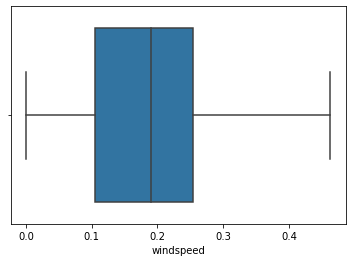

In [80]:
## Cheking
sns.boxplot(data['windspeed'])

## Train and Test split

In [82]:
x=data1.iloc[:,:-1]
y=data1['cnt']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

<IPython.core.display.Javascript object>

In [84]:
#Checking X_train
x_train.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
5749,3,9,0,0,5,1,1,0.64,0.6061,0.65,0.1940
1843,2,3,13,0,2,1,1,0.50,0.4848,0.45,0.2239
13855,3,8,12,0,0,0,1,0.86,0.8030,0.47,0.5224
9723,1,2,2,0,3,1,1,0.30,0.3333,0.61,0.0000
10981,2,4,17,0,6,0,1,0.54,0.5152,0.19,0.4179


In [85]:
#Checking X_test
x_test.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
12830,3,6,19,0,6,0,1,0.80,0.6970,0.27,0.1940
8688,1,1,20,1,1,0,1,0.24,0.2273,0.41,0.2239
7091,4,10,2,0,5,1,1,0.32,0.3030,0.66,0.2836
12230,2,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582
431,1,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881


In [86]:
#Checking y_train
y_train.head()

5749      64
1843     106
13855    491
9723       4
10981    567
Name: cnt, dtype: int64

## Scaling

In [89]:
scaler=StandardScaler()

In [90]:
x_train_s=scaler.fit_transform(x_train)

In [99]:
x_test_s=scaler.transform(x_test)

## Model Building

###  LinearRegression

In [101]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [102]:
lr_p_t=lr.predict(x_test)

In [103]:
r2score=r2_score(y_test,lr_p_t)
r2score

0.3466195775127837

In [108]:
lr_p_train=lr.predict(x_train)

In [109]:
r2score=r2_score(y_train,lr_p_train)
r2score

0.3356165192881213

###  DecisionTree

In [120]:
dt=DecisionTreeRegressor()

In [121]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [122]:
dt_p_t=dt.predict(x_test)

In [123]:
r2score=r2_score(y_test,dt_p_t)
r2score

0.7423590656280095

In [124]:
dt_p_train=dt.predict(x_train)

In [125]:
r2score=r2_score(y_train,dt_p_train)
r2score

0.9999796650666707

#### Hyperparameters of DecisionTree

In [126]:
params = {
    "criterion":('friedman_mse', 'absolute_error', 'poisson'), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

dt=DecisionTreeRegressor()
tree_cv = GridSearchCV(dt, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(x_train,y_train)
best_params=tree_cv.best_params_
print(best_params)

Fitting 3 folds for each of 6498 candidates, totalling 19494 fits
{'criterion': 'poisson', 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}


In [127]:
dt1=DecisionTreeRegressor(**best_params)

In [128]:
dt1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=12, min_samples_leaf=10)

In [129]:
dt_p_t=dt1.predict(x_test)

In [130]:
r2score=r2_score(y_test,dt_p_t)
r2score

0.8128260673794123

In [131]:
dt_p_train=dt1.predict(x_train)

In [132]:
r2score=r2_score(y_train,dt_p_train)
r2score

0.8669765433694179

### Ridge Regression

In [133]:
rr=Ridge()

In [134]:
rr.fit(x_train,y_train)

Ridge()

In [135]:
rr_p_t=rr.predict(x_test)

In [136]:
r2score=r2_score(y_test,rr_p_t)
r2score

0.34659674352474523

In [137]:
rr_p_train=rr.predict(x_train)

In [138]:
r2score=r2_score(y_train,dt_p_train)
r2score

0.8669765433694179

### RandomForest

In [139]:
rf=RandomForestRegressor()

In [140]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [141]:
rf_p_t=rf.predict(x_test)

In [142]:
r2score=r2_score(y_test,rf_p_t)
r2score

0.8636800873400944

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
grid_parm = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf=RandomForestRegressor()
rf_cv=GridSearchCV(rf,grid_parm,scoring="r2",n_jobs=-1,verbose=1,cv=3)

rf_cv.fit(x_train,y_train)
best_params=rf_cv.best_params_
print(best_params)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


In [ ]:
rf1=RandomForestRegressor(**best_params)

In [ ]:
rf1.fit(x_train,y_train)

In [ ]:
rf1_p_t=rf1.predict(x_test)

In [ ]:
r2score=r2_score(y_test,rf1_p_t)
r2score

In [ ]:
rf1_p_train=rf1.predict(x_train)

In [ ]:
r2score=r2_score(y_train,rf1_p_train)
r2score

### Lasso Regression

In [145]:
ls=Lasso()

In [151]:
ls.fit(x_train_s,y_train)

Lasso()

In [152]:
ls_p_t=ls.predict(x_test_s)

In [153]:
r2score=r2_score(y_test,ls_p_t)
r2score

0.34650615534660056

In [154]:
ls_p_train=ls.predict(x_train_s)

In [156]:
r2score=r2_score(y_train,ls_p_train)
r2score

0.33542624163559687

### ANN

In [157]:
ann=MLPRegressor(hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2)

In [158]:
ann.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100,
             random_state=2)

In [159]:
an_p_t=ann.predict(x_test)

In [160]:
r2score=r2_score(y_test,an_p_t)
r2score

0.6604874560861074

In [161]:
an_p_train=ann.predict(x_train)

In [162]:
r2score=r2_score(y_train,an_p_train)
r2score

0.6582944917164367